# 7장 행렬

행렬을 이용한 데이터 표현
- 딥러닝 관련 코드 분석할 때 모델로 입출력 되는 데이터가 어떤 모양인지 정확히 파악해야한다. 

(256, 272, 4)


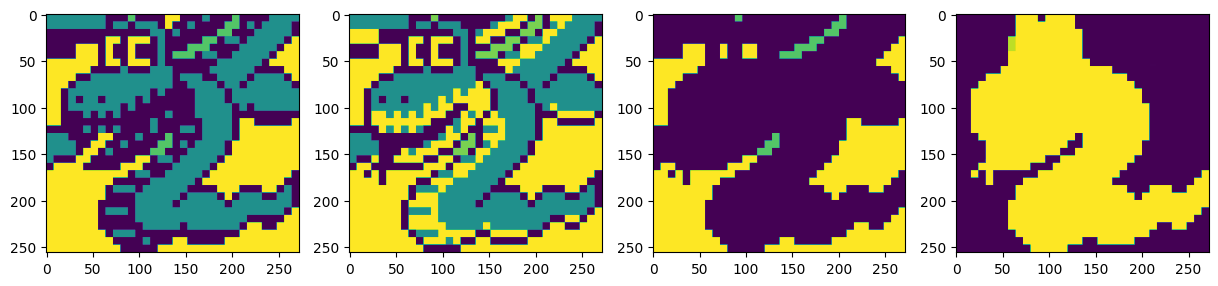

In [2]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread("old_python.png")
print(im.shape)


R = im[:,:,0];G = im[:,:,1];B = im[:,:,2];A = im[:,:,3];
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)
ax1.imshow(R)
ax2.imshow(G)
ax3.imshow(B)
ax4.imshow(A)
plt.show()




3) 문서

문서도 행렬 형태로 전환가능 

단어를 숫자로 매핑하면 

행렬 형태로 문서 출력이 가능하다.

In [4]:
docs = [
'This is the first document',
'This is the second document',
'And the third one',
'Is this the first document']

V = ['', 'and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

pre_docs = list(map(lambda x : x.lower().split(), docs))
pre_docs

D = [[V.index(w) for w in doc] for doc in pre_docs ]

print(D)

N = max([len(doc) for doc in pre_docs])


[[9, 4, 7, 3, 2], [9, 4, 7, 6, 2], [1, 7, 8, 5], [4, 9, 7, 3, 2]]


In [17]:
a = np.array([[10,4],[1,12]])
print(a)
print(a[a>=6])
idx = np.where(a>=6)

print(idx)

[[10  4]
 [ 1 12]]
[10 12]
(array([0, 1], dtype=int64), array([0, 1], dtype=int64))


In [11]:
import numpy as np

a = np.array([[10, 46], [1, 12],[3,12]])
print(a)
print(a[a >= 6])
idx = np.where(a >= 6)

# idx를 [row, column] 형태로 변환
idx_list = list(zip(idx[0], idx[1]))
print(idx_list)


[[10 46]
 [ 1 12]
 [ 3 12]]
[10 46 12 12]
[(0, 0), (0, 1), (1, 1), (2, 1)]


In [9]:
import numpy as np

def f(x):
    if x>0:
        return np.exp(x)
    elif x==0:
        return 1
    else:
        return -np.log(-x)

for x in [-1, 0, 1]:
    print(f(x))


-0.0
1
2.718281828459045


In [11]:
def z(x, y):
    z=(x+y)**2
    return z
print(z(6,6))

144


In [18]:
def num_derivative(f,x,h=0.01):
    return (f(x+h)-f(x))/h
f = lambda x: x**2 +3*x
x =10

derivative = num_derivative(f,x)
print(derivative)

23.00999999999931


In [54]:
import sympy as sp
x = sp.symbols('x')
f =(x**2+4*x)*sp.log(x)

direct_derivative = sp.diff(f,x)

print({direct_derivative.subs(x,2)})

def num(f, x, h=0.01):
    return (f(x+h) - f(x)) / h


derivative = num(lambda x: (x**2 + 4*x) * sp.log(x), 2, 0.001)

print(derivative)


{8*log(2) + 6}
8329.31453731102 - 12000.0*log(2)


In [48]:
import numpy as np

def num(f, x, h=0.01):
    return (f(x+h) - f(x)) / h

# math.log를 사용하여 함수 정의
derivative = num(lambda x: (x**2 + 4*x) * np.log(x), 2, 0.01)

print(derivative)

11.57710893703534


In [65]:
import sympy as sp


x = sp.symbols('x')
f = (x**2 + 4*x) * sp.log(x)

# 직접 미분
direct_derivative = sp.diff(f, x)
direct_value = direct_derivative.subs(x, 2)
print(f'직접 미분 값: {direct_value}')

# 수치 미분 함수
def num(f, x, h=0.01):
    return (f(x + h) - f(x)) / h

# 수치 미분
numerical_derivative = num(lambda x: (x**2 + 4*x) * sp.log(x), 2, 0.0001)
print(f'수치 미분 값: {numerical_derivative}')

직접 미분 값: 8*log(2) + 6
수치 미분 값: 83189.2071639527 - 120000.0*log(2)


In [67]:
import sympy as sp

# 변수 및 함수 정의
x = sp.symbols('x')
f = (x**2 + 4*x) * sp.log(x)

# 직접미분
direct_derivative = sp.diff(f, x)
direct_value = direct_derivative.subs(x, 2)
print(f'직접미분 값: {direct_value}')

# 수치미분 함수 정의
def num(f, x_val, h=0.01):
    return (f.subs(x, x_val + h) - f.subs(x, x_val)) / h

# 수치미분 계산
numerical_derivative = num(f, 2, 0.0001)
print(f'수치미분 값: {numerical_derivative}')

직접미분 값: 8*log(2) + 6
수치미분 값: 83189.2071639527 - 120000.0*log(2)
